|<div style="width:330px"><img src="https://www.ufz.de/static/custom/weblayout/DefaultInternetLayout/img/logos/ufz_transparent_de_blue.png" width="300"/></div>|<div style="width:290px"><img src="https://discourse.opengeosys.org/uploads/default/original/1X/a288c27cc8f73e6830ad98b8729637a260ce3490.png" width="290"/></div>|<div style="width:330px"><img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="300"/></div>|
|---|---|--:|

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ogstools as ot
import ogs as ogs
import pyvista as pv
import plot_settings

# Einfache HM-gekoppelte Effekte um ein Bohrloch

Bohrlochdurchmesser: 244 mm

Vertikalspannung: 10 MPa, Horizontalspannung: 8 MPa (isotrop)

Hydrostatischer Wasserdruck: 4.5 MPa (knapp 500 m Tiefe).

Direkter Kontakt zu anstehendem Tonmergel.

Folgende Druck- und Totalspannunsbedingungen werden im Bohrloch gefahren:

In [2]:
r_borehole = .122
l_domain = 10.
h_domain = 1.122
l_min = 0.03

In [3]:
ogs.cli.generateStructuredMesh(o='borehole.vtu',e='quad',lx=l_domain,ly=h_domain,dx0=l_min,mx=1.07,ny=2,ox=r_borehole)

[2025-04-09 10:15:12.724] [ogs] [info] Mesh created: 144 nodes, 94 elements.


0

In [4]:
ogs.cli.createQuadraticMesh(i='borehole.vtu',o='borehole_q8.vtu')

[2025-04-09 10:15:12.739] [ogs] [info] Create a quadratic order mesh
[2025-04-09 10:15:12.739] [ogs] [info] Save the new mesh into a file


0

In [5]:
mesh = pv.read("borehole.vtu")
# Calculate the mesh size in x and y directions
#mesh.points[:, 1] *= 300

plotter = pv.Plotter(window_size=[1000,400])
plotter.add_mesh(mesh, show_edges=True, show_scalar_bar=False, colormap="coolwarm")

plotter.show_bounds(ticks="outside", show_xaxis=True, show_yaxis=False, xtitle="$r$ / m", show_xlabels=True, bold=False)
plotter.view_xy()
#plotter.camera.zoom(2)
plotter.show()

Widget(value='<iframe src="http://localhost:42765/index.html?ui=P_0x7c90d261a690_0&reconnect=auto" class="pyvi…

In [6]:
ogs.cli.ExtractBoundary(i = 'borehole_q8.vtu', o='boundaries_q8.vtu')

[2025-04-09 10:15:13.429] [ogs] [info] Mesh read: 381 nodes, 94 elements.
[2025-04-09 10:15:13.429] [ogs] [info] 0 property vectors copied, 0 vectors skipped.
[2025-04-09 10:15:13.429] [ogs] [info] Created surface mesh: 196 nodes, 98 elements.


0

In [7]:
tol = l_min/100
ogs.cli.removeMeshElements(i='boundaries_q8.vtu',o='geometry_farfield.vtu',**{"x-max": l_domain+r_borehole-tol})
ogs.cli.removeMeshElements(i='boundaries_q8.vtu',o='geometry_borehole.vtu',**{"x-min": r_borehole+tol})
ogs.cli.removeMeshElements(i='boundaries_q8.vtu',o='geometry_top.vtu',**{"y-max": h_domain-tol})
ogs.cli.removeMeshElements(i='boundaries_q8.vtu',o='geometry_bottom.vtu',**{"y-min": tol})

[2025-04-09 10:15:13.454] [ogs] [info] Mesh read: 196 nodes, 98 elements.
[2025-04-09 10:15:13.454] [ogs] [info] Bounding box of "boundaries_q8" is
x = [0.122000,10.122000]
y = [0.000000,1.122000]
z = [0.000000,0.000000]
[2025-04-09 10:15:13.454] [ogs] [info] 96 elements found.
[2025-04-09 10:15:13.454] [ogs] [info] Removing total 96 elements...
[2025-04-09 10:15:13.454] [ogs] [info] 2 elements remain in mesh.
[2025-04-09 10:15:13.454] [ogs] [info] Removing total 191 nodes...
[2025-04-09 10:15:13.467] [ogs] [info] Mesh read: 196 nodes, 98 elements.
[2025-04-09 10:15:13.468] [ogs] [info] Bounding box of "boundaries_q8" is
x = [0.122000,10.122000]
y = [0.000000,1.122000]
z = [0.000000,0.000000]
[2025-04-09 10:15:13.468] [ogs] [info] 96 elements found.
[2025-04-09 10:15:13.468] [ogs] [info] Removing total 96 elements...
[2025-04-09 10:15:13.468] [ogs] [info] 2 elements remain in mesh.
[2025-04-09 10:15:13.468] [ogs] [info] Removing total 191 nodes...
[2025-04-09 10:15:13.478] [ogs] [info]

0

## Simulation

In [8]:
#Bohrlochbedingungen
dt = np.array([0,365000,10,100,5,5,5,5,365*4,1])#d
p = np.array([45,45,45,45,130,130,45,90,90,45])#bar
s = np.array([80,80,45,45,130,130,45,90,90,45])#bar

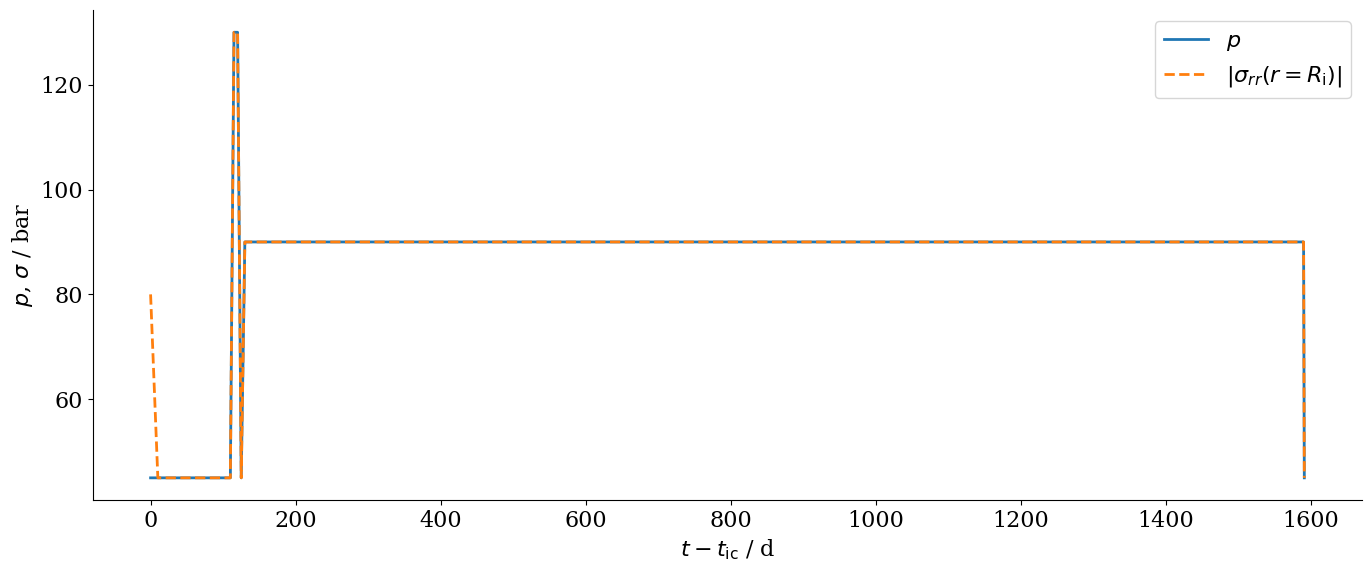

In [9]:
fig,ax = plt.subplots(figsize=(14,6))
ax.plot(dt.cumsum()[1:]-dt[1],p[1:],label='$p$')
ax.plot(dt.cumsum()[1:]-dt[1],s[1:],label='$|\\sigma_{rr}(r = R_\\mathrm{i})|$',ls='--')
ax.set_xlabel('$t-t_\\mathrm{ic}$ / d')
ax.set_ylabel('$p$, $\\sigma$ / bar')
ax.legend()
fig.tight_layout()

In [10]:
labels = ['initial', 'drilled', 'rest', 'frac start', 
          'frac end', 'rest', 'operation start', 'operation end', 'rest']

In [11]:
model_mc=ot.Project(input_file="borehole.prj", output_file="borehole_lin.prj")
model_mc.replace_medium_property_value(mediumid=0, name="biot_coefficient", value="0.8")
model_mc.replace_text("borehole_lin", xpath="./time_loop/output/prefix")

In [12]:
model_mc.write_input()
model_mc.run_model()

OGS finished with project file borehole_lin.prj.
Execution took 2.7779715061187744 s
Project file written to output.


In [13]:
model_inc=ot.Project(input_file="borehole.prj", output_file="borehole_inc.prj")
model_inc.replace_medium_property_value(mediumid=0, name="biot_coefficient", value="1.0")

In [14]:
model_inc.replace_text("borehole_inc", xpath="./time_loop/output/prefix")

In [15]:
model_inc.write_input()
model_inc.run_model()

OGS finished with project file borehole_inc.prj.
Execution took 2.849575996398926 s
Project file written to output.


In [16]:
pvd_mc = ot.MeshSeries("borehole_lin.pvd")
pvd_inc = ot.MeshSeries("borehole_inc.pvd")

In [ ]:
def plot_results(version1,version2):
    fig, ax = plt.subplots(figsize=(14,18),nrows=5,ncols=2)
    j=0
    i=0
    colors=['red','green','blue']
    for k,tt in enumerate(dt.cumsum()[1:]):
        idx = int((np.abs(pvd_mc.timevalues - tt)).argmin())
        if (j==2):
            j=0
            i+=1
        sample = version1[idx].sample_over_line([r_borehole, 0.5, 0], [3, 0.5, 0])
        ax[i][j].plot(sample['Texture Coordinates'].T[0],sample['pressure_interpolated']/1e5,
                label=r'$p$',color=colors[0])
        ax[i][j].plot(sample['Texture Coordinates'].T[0],sample['sigma'].T[0]/1e5,ls='--',
                      label=r"$\sigma'_{rr}$",color=colors[1])
        ax[i][j].plot(sample['Texture Coordinates'].T[0],sample['sigma'].T[2]/1e5/1e5,ls=':',
                      label=r"$\sigma'_{\theta\theta}$",color=colors[2])
        #
        sample = version2[idx].sample_over_line([r_borehole, 0.5, 0], [3, 0.5, 0])
        ax[i][j].plot(sample['Texture Coordinates'].T[0],sample['pressure_interpolated']/1e5,
                color=colors[0],alpha=0.2)
        ax[i][j].plot(sample['Texture Coordinates'].T[0],sample['sigma'].T[0]/1e5,ls='--',
                      color=colors[1],alpha=0.2)
        ax[i][j].plot(sample['Texture Coordinates'].T[0],sample['sigma'].T[2]/1e5,ls=':',
                      color=colors[2],alpha=0.2)
        ax[i][j].set_xlabel(r'$(r-r_\text{borhole})$ / m')
        ax[i][j].set_ylabel(r'$p$ / bar, $\sigma$ / bar')
        ax[i][j].legend(loc='lower right',ncols=3)
        ax[i][j].set_title(labels[k])
        j+=1
    ax[-1, -1].axis('off')
    fig.tight_layout()

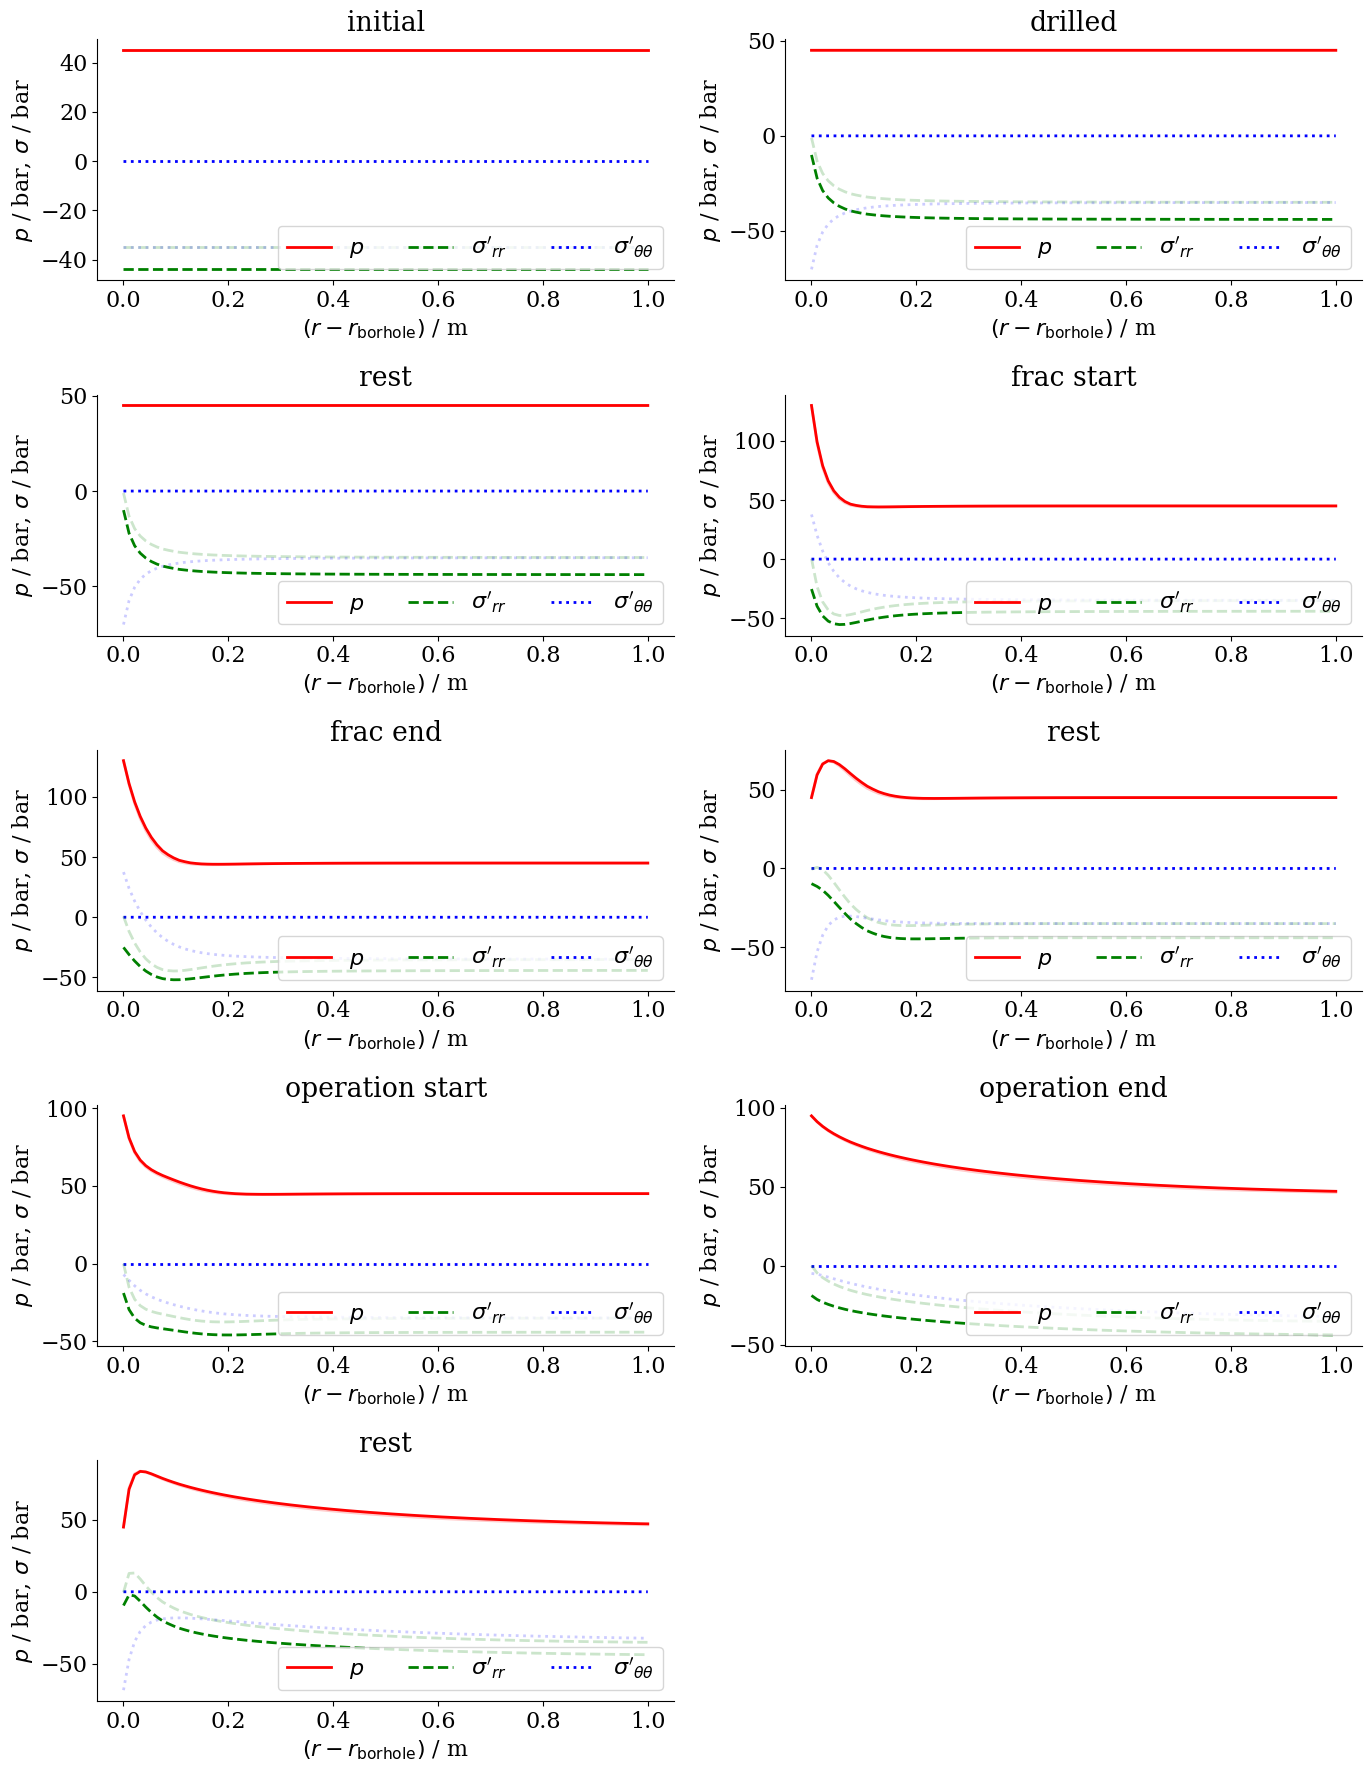

In [29]:
plot_results(pvd_mc,pvd_inc)

Dunkle Linien: $\alpha_\text{B} = 0.8$
Transparente Linien: $\alpha_\text{B} = 1.0$

## Vergleich Quad8 Quad4

In [18]:
model_lin=ot.Project(input_file="borehole.prj", output_file="borehole_lin.prj")
model_lin.replace_medium_property_value(mediumid=0, name="biot_coefficient", value="0.8")
model_lin.replace_text("borehole_lin", xpath="./time_loop/output/prefix")

In [19]:
model_lin.replace_text("borehole.vtu", xpath="./meshes/mesh", occurrence=0)
model_lin.replace_text("borehole", xpath="./parameters/parameter/mesh")
model_lin.replace_text("2", xpath="./processes/process/integration_order")
model_lin.replace_text("1", xpath="./process_variables/process_variable/order")

In [20]:
model_lin.write_input()

In [21]:
model_lin.run_model()

OGS finished with project file borehole_lin.prj.
Execution took 1.1780760288238525 s
Project file written to output.


In [22]:
pvd_lin = ot.MeshSeries("borehole_lin.pvd")

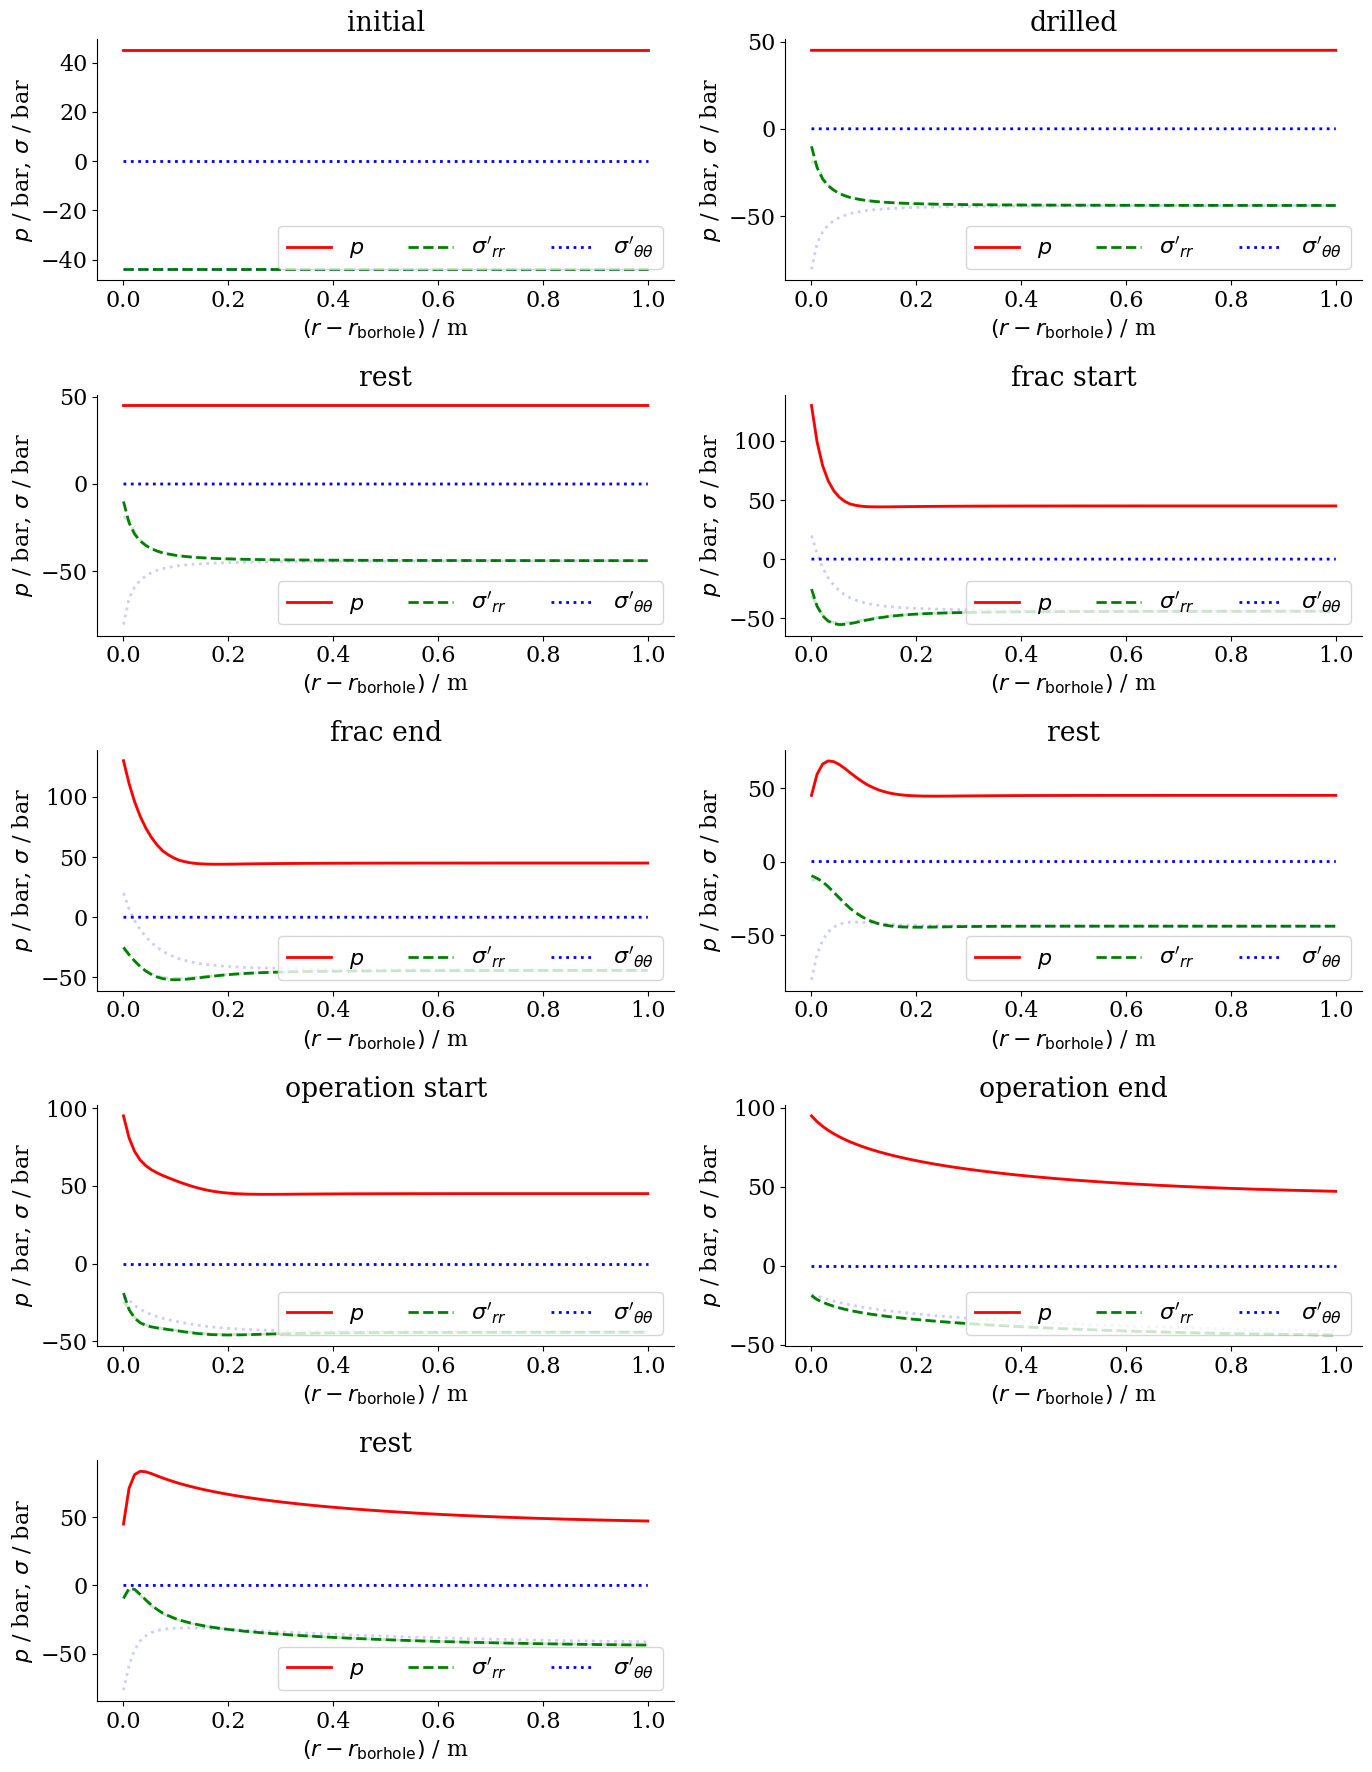

In [30]:
plot_results(pvd_mc,pvd_lin)

Dunkle Linien: Q8; Transparente Linien: Q4

## Ohne Mass Lumping

Näheres zum mass lumping [hier](https://mybinder.org/v2/gh/nagelt/Numerical_Methods_Introduction/HEAD?labpath=07d_Terzaghi_1D_consolidation_mass_lumping.ipynb).

In [24]:
model_lin_noML=ot.Project(input_file="borehole_lin.prj", output_file="borehole_lin_noML.prj")
model_lin_noML.replace_text("false", xpath="./processes/process/mass_lumping")
model_lin_noML.replace_text("borehole_lin_noML", xpath="./time_loop/output/prefix")
model_lin_noML.write_input()

In [25]:
model_lin_noML.run_model()

OGS finished with project file borehole_lin_noML.prj.
Execution took 1.309671401977539 s
Project file written to output.


In [26]:
pvd_lin_noML = ot.MeshSeries("borehole_lin_noML.pvd")

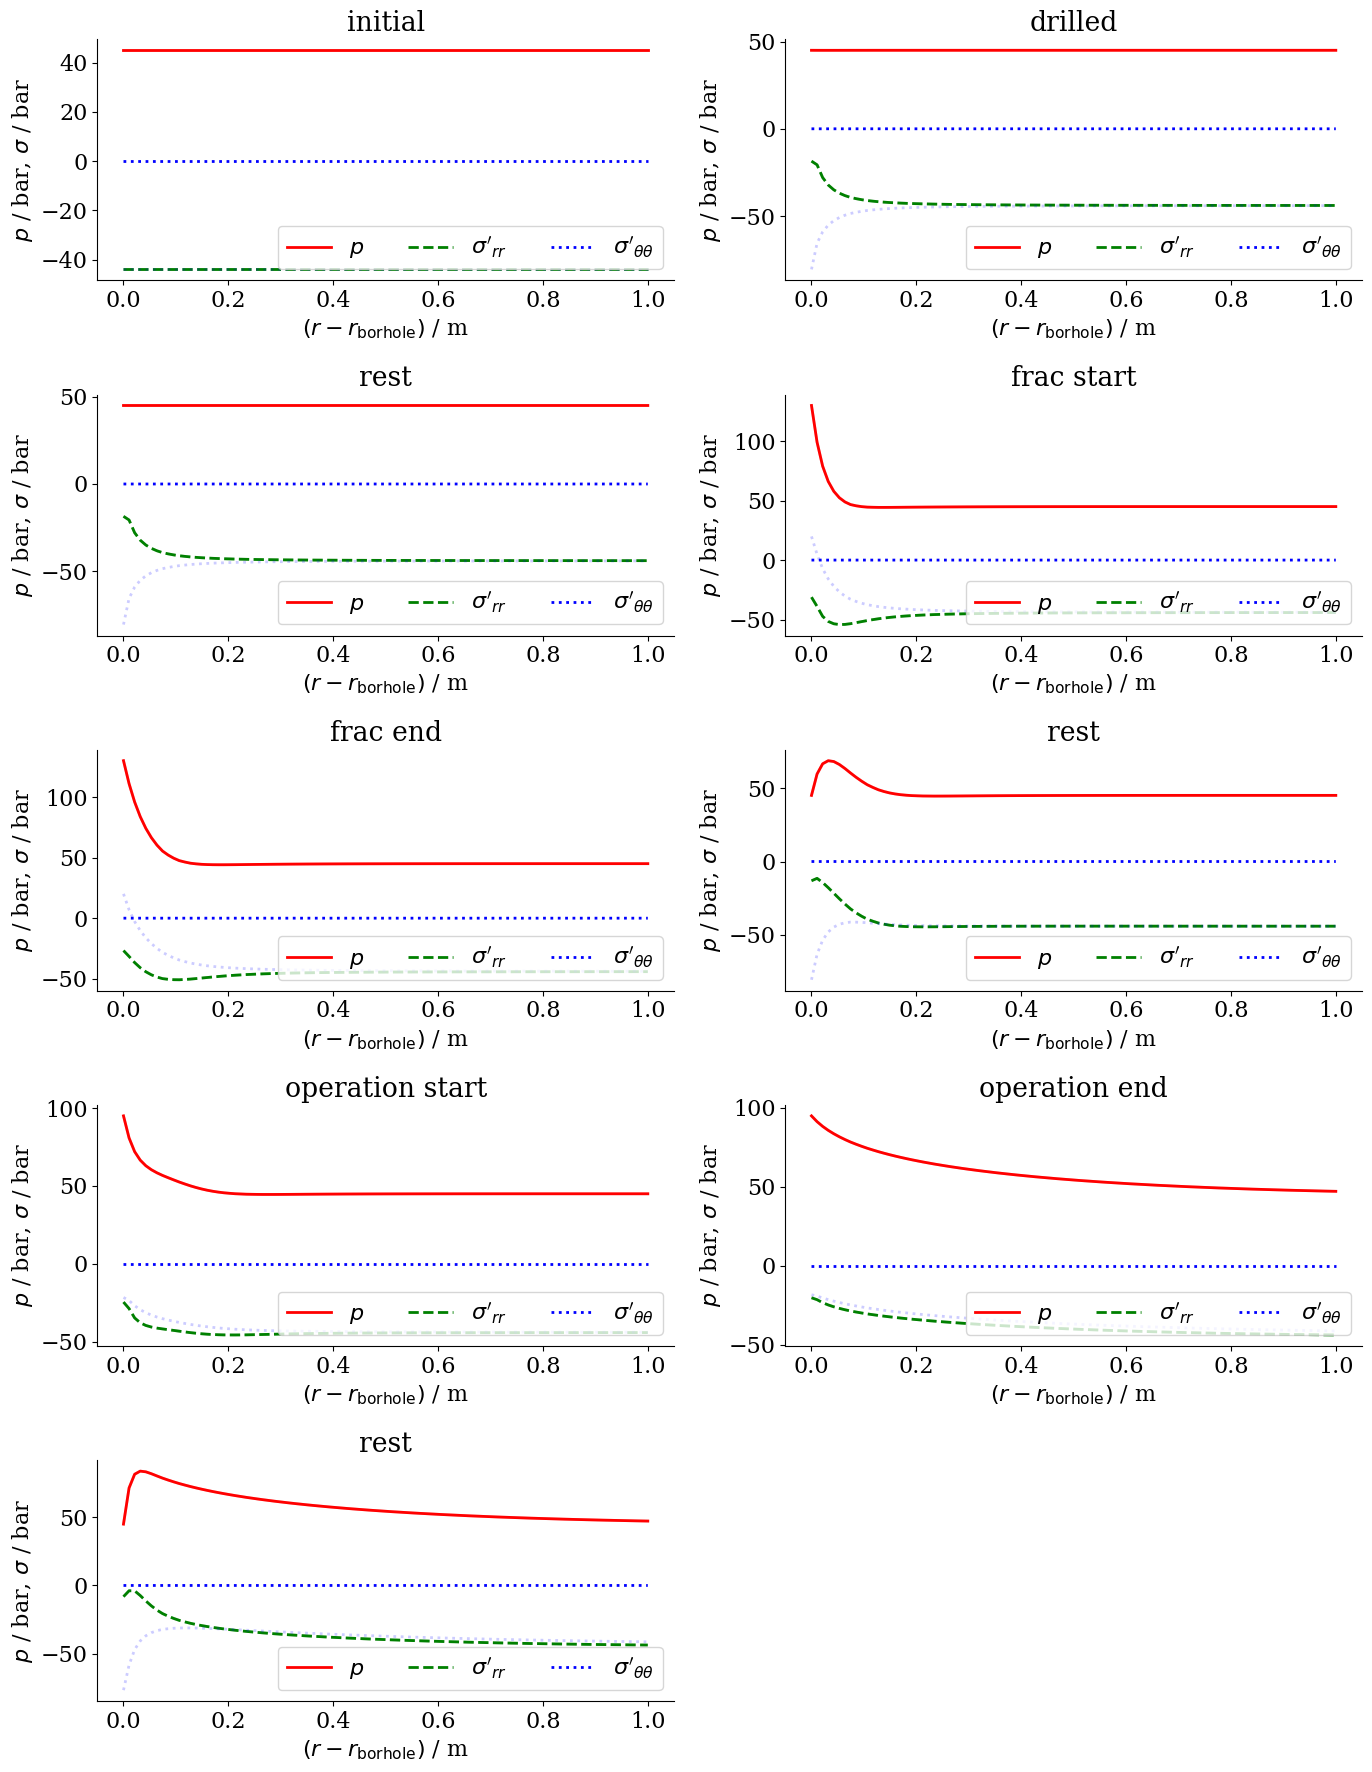

In [31]:
plot_results(pvd_lin,pvd_lin_noML)